In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#import sklearn

In [2]:
pd_flow_patterns = pd.read_csv("BD12Experiments6FP.csv")


In [3]:
print (pd_flow_patterns.info)

<bound method DataFrame.info of           Vsl       Vsg     VisL     VisG    DenL  DenG     ST  Ang      ID  \
0     0.04482   0.81402  0.00100  0.00007  1000.0  1.12  0.070  0.0  0.0254   
1     0.06098   0.81402  0.00100  0.00007  1000.0  1.12  0.070  0.0  0.0254   
2     0.08811   0.81402  0.00100  0.00007  1000.0  1.12  0.070  0.0  0.0254   
3     0.06098   1.10366  0.00100  0.00007  1000.0  1.12  0.070  0.0  0.0254   
4     0.12195   1.10366  0.00100  0.00007  1000.0  1.12  0.070  0.0  0.0254   
...       ...       ...      ...      ...     ...   ...    ...  ...     ...   
9024  1.75000   0.55000  0.17906  0.00001   872.4  2.10  0.032  0.0  0.0508   
9025  1.75000   0.99000  0.17906  0.00001   870.2  2.11  0.032  0.0  0.0508   
9026  1.73000   1.51000  0.17964  0.00001   870.4  2.16  0.032  0.0  0.0508   
9027  1.74000   2.00000  0.17964  0.00001   870.7  2.22  0.032  0.0  0.0508   
9028  1.68000  10.70000  0.18143  0.00001   866.3  3.30  0.032  0.0  0.0508   

      FlowPattern  

In [4]:
print(pd_flow_patterns.describe())

               Vsl          Vsg         VisL         VisG         DenL  \
count  9029.000000  9029.000000  9029.000000  9029.000000  9029.000000   
mean      0.786837     5.894700     0.012334     0.000017   951.239041   
std       1.282596    10.415176     0.066958     0.000009   109.882425   
min       0.000240     0.003720     0.000010     0.000000    77.041600   
25%       0.045640     0.173660     0.001000     0.000010   879.400000   
50%       0.210810     1.581710     0.001000     0.000020  1000.000000   
75%       1.000000     7.469510     0.003220     0.000020  1000.000000   
max      25.517000   200.609760     0.601280     0.000070  1059.000000   

              DenG           ST          Ang           ID  FlowPattern  
count  9029.000000  9029.000000  9029.000000  9029.000000  9029.000000  
mean      4.136893     3.234937     3.609715     0.047157     4.052608  
std       8.681986    22.233329    38.746648     0.026143     1.365682  
min       0.125410     0.013400   -90.000

In [5]:
from sklearn.model_selection import train_test_split

X = pd_flow_patterns.drop(columns = "FlowPattern")

y = pd_flow_patterns.FlowPattern

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 39 ) #only test 20%, random_state(aka seed) = 42





In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn_ACCU = []


#adjusted the seed and the n_neighbors to get a slightly better accuracy.


knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
    
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print ("accu: ",  accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)



accu:  0.8571428571428571


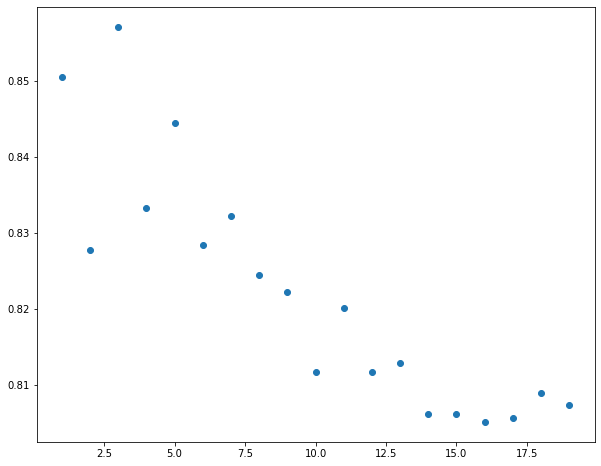

In [7]:
#Here i looped thru a series of n_neighbors to see how the accuracy improves or worsen as it grows.

knn_ACCU = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    knn_ACCU.append(accuracy)

knn_accuracy_points = np.array(knn_ACCU)

x_accu = range(1,20)
plt.figure(figsize=(10,8))
plt.scatter(x_accu, knn_ACCU)
plt.show()

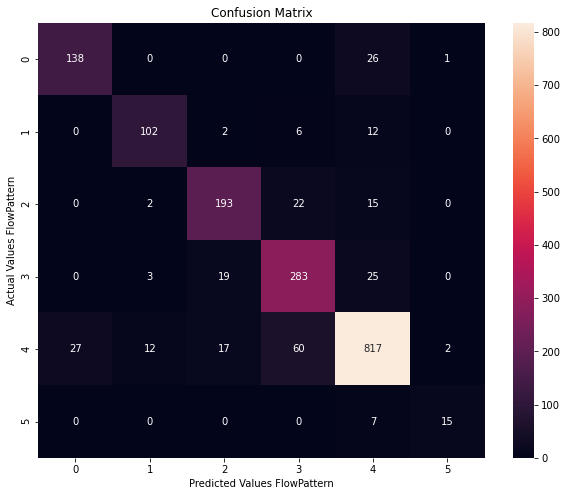

In [8]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values FlowPattern')
plt.xlabel('Predicted Values FlowPattern')
plt.show()